This project is aim to use historical weather data like temperature, humidity, windspeed, visibility and the pressure, and predict whater was rained or not. the target is extracted from `weather` Since the purpose is to predict the rain only.


# 1. Import the libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
import seaborn as sns
from datetime import timedelta
plt.style.use('fivethirtyeight')


# 2. Loading the data and data cleaning

In [2]:
! pwd

/Users/ALORFI/Documents/bootcamp/Project/Final_project


In [3]:
df = pd.read_csv('../../Project/dataset/weather-sa-2017-2019-clean.csv')
df.shape

(249023, 15)

In [4]:
df.head()

,Unnamed: 0,city,date,time,year,month,day,hour,minute,weather,temp,wind,humidity,barometer,visibility
0,0,Qassim,1 January 2017,00:00,2017,1,1,24,0,Clear,17,11,64%,1018.0,16
1,1,Qassim,1 January 2017,01:00,2017,1,1,1,0,Clear,17,6,64%,1018.0,16
2,2,Qassim,1 January 2017,03:00,2017,1,1,3,0,Clear,15,11,72%,1019.0,16
3,3,Qassim,1 January 2017,04:00,2017,1,1,4,0,Clear,15,11,72%,1019.0,16
4,4,Qassim,1 January 2017,05:00,2017,1,1,5,0,Clear,15,9,72%,1019.0,16


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249023 entries, 0 to 249022
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  249023 non-null  int64  
 1   city        249023 non-null  object 
 2   date        249023 non-null  object 
 3   time        249023 non-null  object 
 4   year        249023 non-null  int64  
 5   month       249023 non-null  int64  
 6   day         249023 non-null  int64  
 7   hour        249023 non-null  int64  
 8   minute      249023 non-null  int64  
 9   weather     249023 non-null  object 
 10  temp        249023 non-null  int64  
 11  wind        249023 non-null  int64  
 12  humidity    249006 non-null  object 
 13  barometer   248951 non-null  float64
 14  visibility  249023 non-null  int64  
dtypes: float64(1), int64(9), object(5)
memory usage: 28.5+ MB


It show that we have 10 Numerical with int and float variable and 5 Categorical variable with object datatype

### 2.1 Lets Drop irrelated and duplicated features

In [6]:
# Unnamed: 0 is irrlevent 
# date and time are duplicated features 
delete_col =['Unnamed: 0','date','time' ]
df.drop(delete_col, axis =1 , inplace =True)

In [7]:
#replace space to NULL if found in the datafram
df = df.replace(" ", np.nan).replace("N/A", np.nan ).replace("NA", np.nan).replace("", np.nan)

### 2.2 Lets convert feature `humidity` to Numerical

In [8]:
df['humidity'] = df['humidity'].str.replace('%',' ').astype('float')


In [9]:
df.isnull().sum()

city           0
year           0
month          0
day            0
hour           0
minute         0
weather        0
temp           0
wind           0
humidity      17
barometer     72
visibility     0
dtype: int64

We have 17 missing values in `humidity`
and 71 missing value in `barometer`

### 2.3 Dealing with missing values

#### I decide to get means of the humidity and barometer per each city to be replaced with missing values.


checking the means for `humidity` and `barometer` for each city.

In [10]:
# Here to display the means per city.
df.groupby(by='city')[['humidity','barometer']].mean().reset_index()


,city,humidity,barometer
0,Assir,47.590154,1023.498147
1,Baha,38.722982,1019.012376
2,EP,45.092703,1008.609077
3,Hail,41.536087,1013.528736
4,Jawf,30.500442,1015.505283
5,Jazan,45.803066,1023.087145
6,Madina,19.971600,1014.141254
7,Mecca,54.158772,1008.713919
8,Najran,45.953645,1023.093818
9,Northern boarder,26.263764,1012.641971


In [11]:
# now filling the missing values with means for each city
df['humidity'] = df['humidity'].fillna(df.groupby('city')['humidity'].transform('mean'))


In [12]:
df['barometer'] = df['barometer'].fillna(df.groupby('city')['barometer'].transform('mean'))


In [13]:
df.isnull().sum()

city          0
year          0
month         0
day           0
hour          0
minute        0
weather       0
temp          0
wind          0
humidity      0
barometer     0
visibility    0
dtype: int64

In [14]:
df.describe()

,year,month,day,hour,minute,temp,wind,humidity,barometer,visibility
count,249023.000000,249023.000000,249023.000000,249023.000000,249023.000000,249023.000000,249023.000000,249023.000000,249023.000000,249023.000000
mean,2017.710007,6.050694,15.691081,12.536890,0.131108,24.722624,12.957104,37.553192,1015.454041,11.053453
std,0.706113,3.521591,8.787958,6.910254,1.970710,8.880913,8.711619,23.592329,6.970366,7.053005
min,2017.000000,1.000000,1.000000,1.000000,0.000000,-4.000000,-1.000000,0.000000,904.000000,-1.000000
25%,2017.000000,3.000000,8.000000,7.000000,0.000000,18.000000,7.000000,17.000000,1011.000000,5.000000
50%,2018.000000,6.000000,16.000000,13.000000,0.000000,24.000000,11.000000,32.000000,1016.000000,16.000000
75%,2018.000000,9.000000,23.000000,19.000000,0.000000,31.000000,19.000000,55.000000,1021.000000,16.000000
max,2019.000000,12.000000,31.000000,24.000000,59.000000,50.000000,163.000000,100.000000,1101.000000,161.000000


### 2.4 Extract and create the target 

it is obvious that `weather` in the dataset represents the weather phenomenas, which are in a text format. and multiple phenomena merged together. Since we are predicting the rain only, So we will extract the keywords `rain` and it's synonyms and placed in a new column shows the result whether is rained or not raind on that day.

Lets check weather phenomena

In [15]:
df['weather'].unique()

array(['Clear ', 'Sunny ', 'Scattered clouds ', 'Partly sunny ',
       'Passing clouds ', 'Refreshingly cool ', 'Low level haze ',
       'Duststorm ', 'Thunderstorms  Passing clouds ', 'Fog ',
       'Thunderstorms  Partly sunny ', 'Light rain  Partly sunny ',
       'Dense fog ', 'Thunderstorms  Scattered clouds ',
       'Rain  Passing clouds ', 'Extremely hot ', 'Rain  Partly sunny ',
       'Pleasantly warm ', 'Hot ', 'Mild ', 'Overcast ',
       'Rain  Overcast ', 'Smoke ', 'Thunderstorms  Broken clouds ',
       'Heavy rain  Partly sunny ', 'Thunderstorms  Overcast ',
       'Light rain  Overcast ', 'Warm ', 'Thunderstorms  Cloudy ',
       'Drizzle  Overcast ', 'Thunderstorms  Partly cloudy ',
       'Broken clouds ', 'Sandstorm ', 'Partly cloudy ', 'Mostly cloudy ',
       'Rain  Partly cloudy ', 'Rain  Broken clouds ',
       'Rain  Scattered clouds ', 'Haze ', 'Rain  Mostly cloudy ',
       'Hail  Partly sunny ', 'Thundershowers  Passing clouds ',
       'Thunderstorms  Mor

In [16]:
# creating the target `rain`
df['rain'] = df['weather'].str.contains('rain|shower|thunderstorm|thundershowers', case = False ,regex=True)


In [17]:
# lets check a sample
df.groupby('weather')['rain'].unique().sample(20)

weather
Cloudy                               [False]
Rain  Scattered clouds                [True]
Rain  Fog                             [True]
Fog                                  [False]
Rain  Sandstorm                       [True]
Haze                                 [False]
Drizzle  Broken clouds               [False]
Rain  Clear                           [True]
Warm                                 [False]
Extremely hot                        [False]
Thunderstorms  Mostly cloudy          [True]
Thundershowers  Scattered clouds      [True]
Rain  More clouds than sun            [True]
Partly sunny                         [False]
Sprinkles  Cloudy                    [False]
Mild                                 [False]
Rain  Overcast                        [True]
Thunderstorms  Partly cloudy          [True]
Drizzle  More clouds than sun        [False]
Drizzle  Mostly cloudy               [False]
Name: rain, dtype: object

In [18]:
df['rain'].value_counts()

False    245696
True       3327
Name: rain, dtype: int64

3327 observations was rained and 245696 was not so, data is imbalnced 

In [19]:
# Now we don't need the weather column because we on intrested in rain.
df.drop('weather', axis =1 , inplace =True)

# 3. EDA

### 3.1 identify outliers

In [20]:
df.loc[:,'temp':'visibility'].describe()

,temp,wind,humidity,barometer,visibility
count,249023.000000,249023.000000,249023.000000,249023.000000,249023.000000
mean,24.722624,12.957104,37.553192,1015.454041,11.053453
std,8.880913,8.711619,23.592329,6.970366,7.053005
min,-4.000000,-1.000000,0.000000,904.000000,-1.000000
25%,18.000000,7.000000,17.000000,1011.000000,5.000000
50%,24.000000,11.000000,32.000000,1016.000000,16.000000
75%,31.000000,19.000000,55.000000,1021.000000,16.000000
max,50.000000,163.000000,100.000000,1101.000000,161.000000


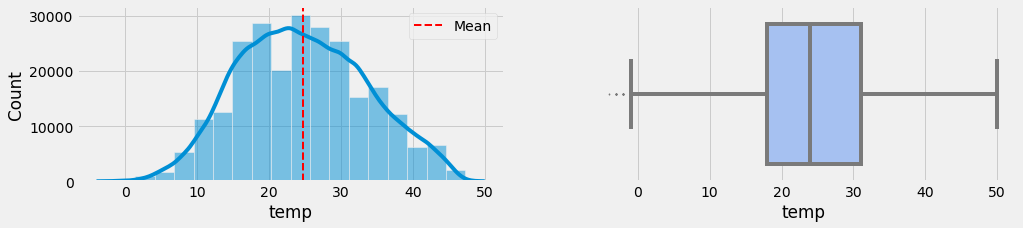

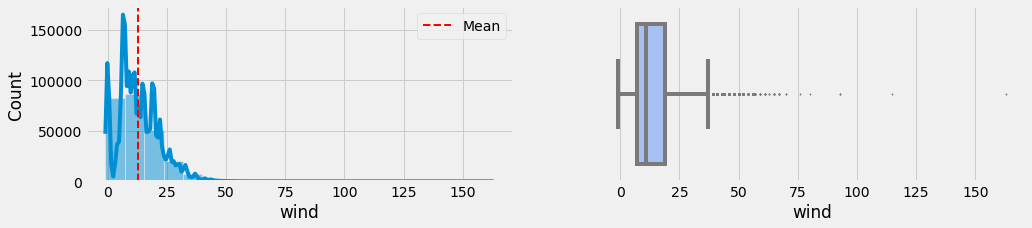

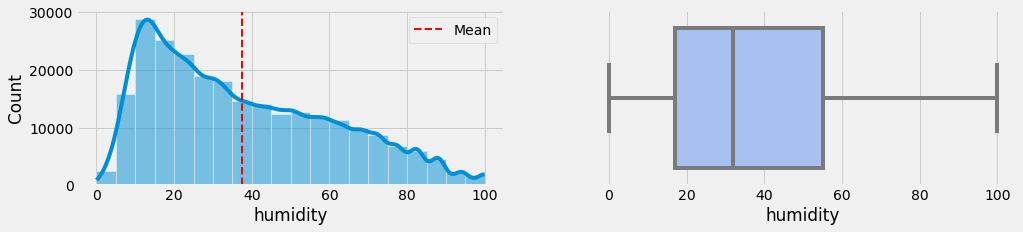

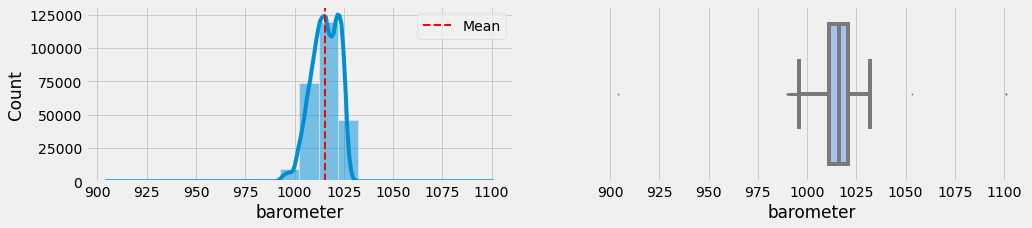

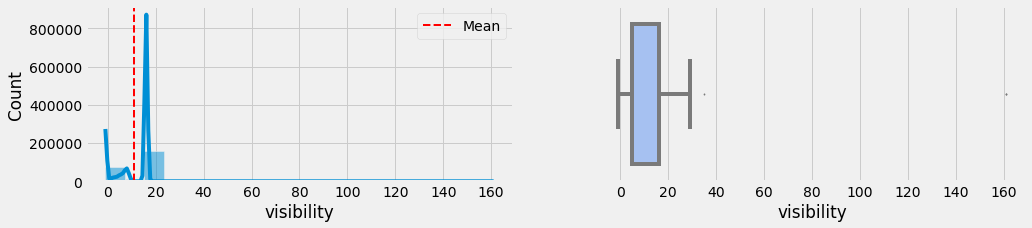

In [21]:
num_cols=df.loc[:,'temp':'visibility'].select_dtypes(include=['int64','float64']).columns.tolist() # a revised list of numerical features  


#sns.set_style('darkgrid')
#sns.set_palette("Spectral" )
for i in num_cols:
   
    fig, axs = plt.subplots(1,2,figsize=(15, 3))

    sns.histplot(df[i],bins=20, kde=True,ax=axs[0]);
    sns.boxplot(x= df[i], ax = axs[1], color='#99befd', fliersize=1);
    
    axs[0].axvline(df[i].mean(), color='r', linewidth=2, linestyle='--', label='Mean')
    axs[0].legend()

We can see that too many outliers on `wind`, and few on `temp`, `visibility`, `barometer` and shows skewed distribution. So, I will use interquantile range to find outliers.

In [22]:
# find outliers for temp variable
columns = df.loc[:,'temp':'visibility'].columns


for f in columns:
    IQR = df[f].quantile(0.75) - df[f].quantile(0.25)
    Lower_fence = df[f].quantile(0.25) - (IQR * 1.5)
    Upper_fence = df[f].quantile(0.75) + (IQR * 1.5)
    print(f,' outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


temp  outliers are values < -1.5 or > 50.5
wind  outliers are values < -11.0 or > 37.0
humidity  outliers are values < -40.0 or > 112.0
barometer  outliers are values < 996.0 or > 1036.0
visibility  outliers are values < -11.5 or > 32.5


Lets discover patterns and relationships between variables in the dataset.

In [23]:
correlation = df.corr()

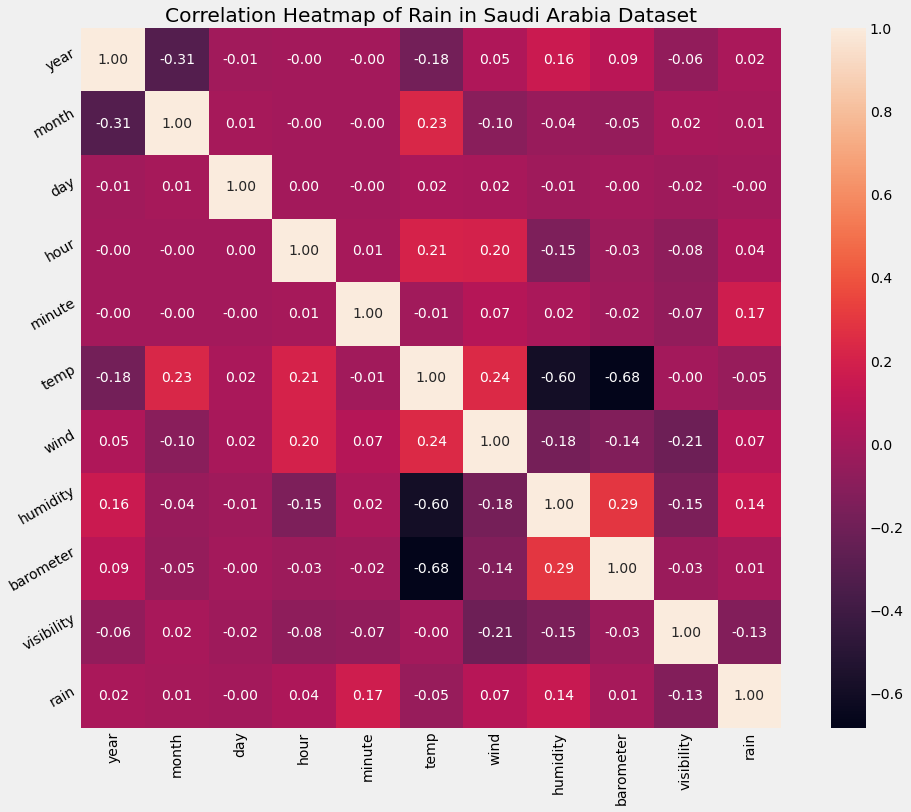

In [24]:
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Rain in Saudi Arabia Dataset')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

There no stronge positive relationship between the features
 - `barometer` and `humidity` positively correlated with correlation coefficient = 0.29. 
 - `temp`and `month` positively correlated with correlation coefficient = 0.23. 
 - `temp`and `hours` positively correlated with correlation coefficient = 0.21.
 - `wind`and `hours` positively correlated with correlation coefficient = 0.20.
 - `temp`and `wind`  positively correlated with correlation coefficient = 0.24.

 - `temp`and `barometer`  Negatively correlated with correlation coefficient = -0.68.
 - `temp`and `humidity`  Negatively correlated with correlation coefficient = -0.60.

 Also the pattren in pairplot Illustrate the relations.
 
 

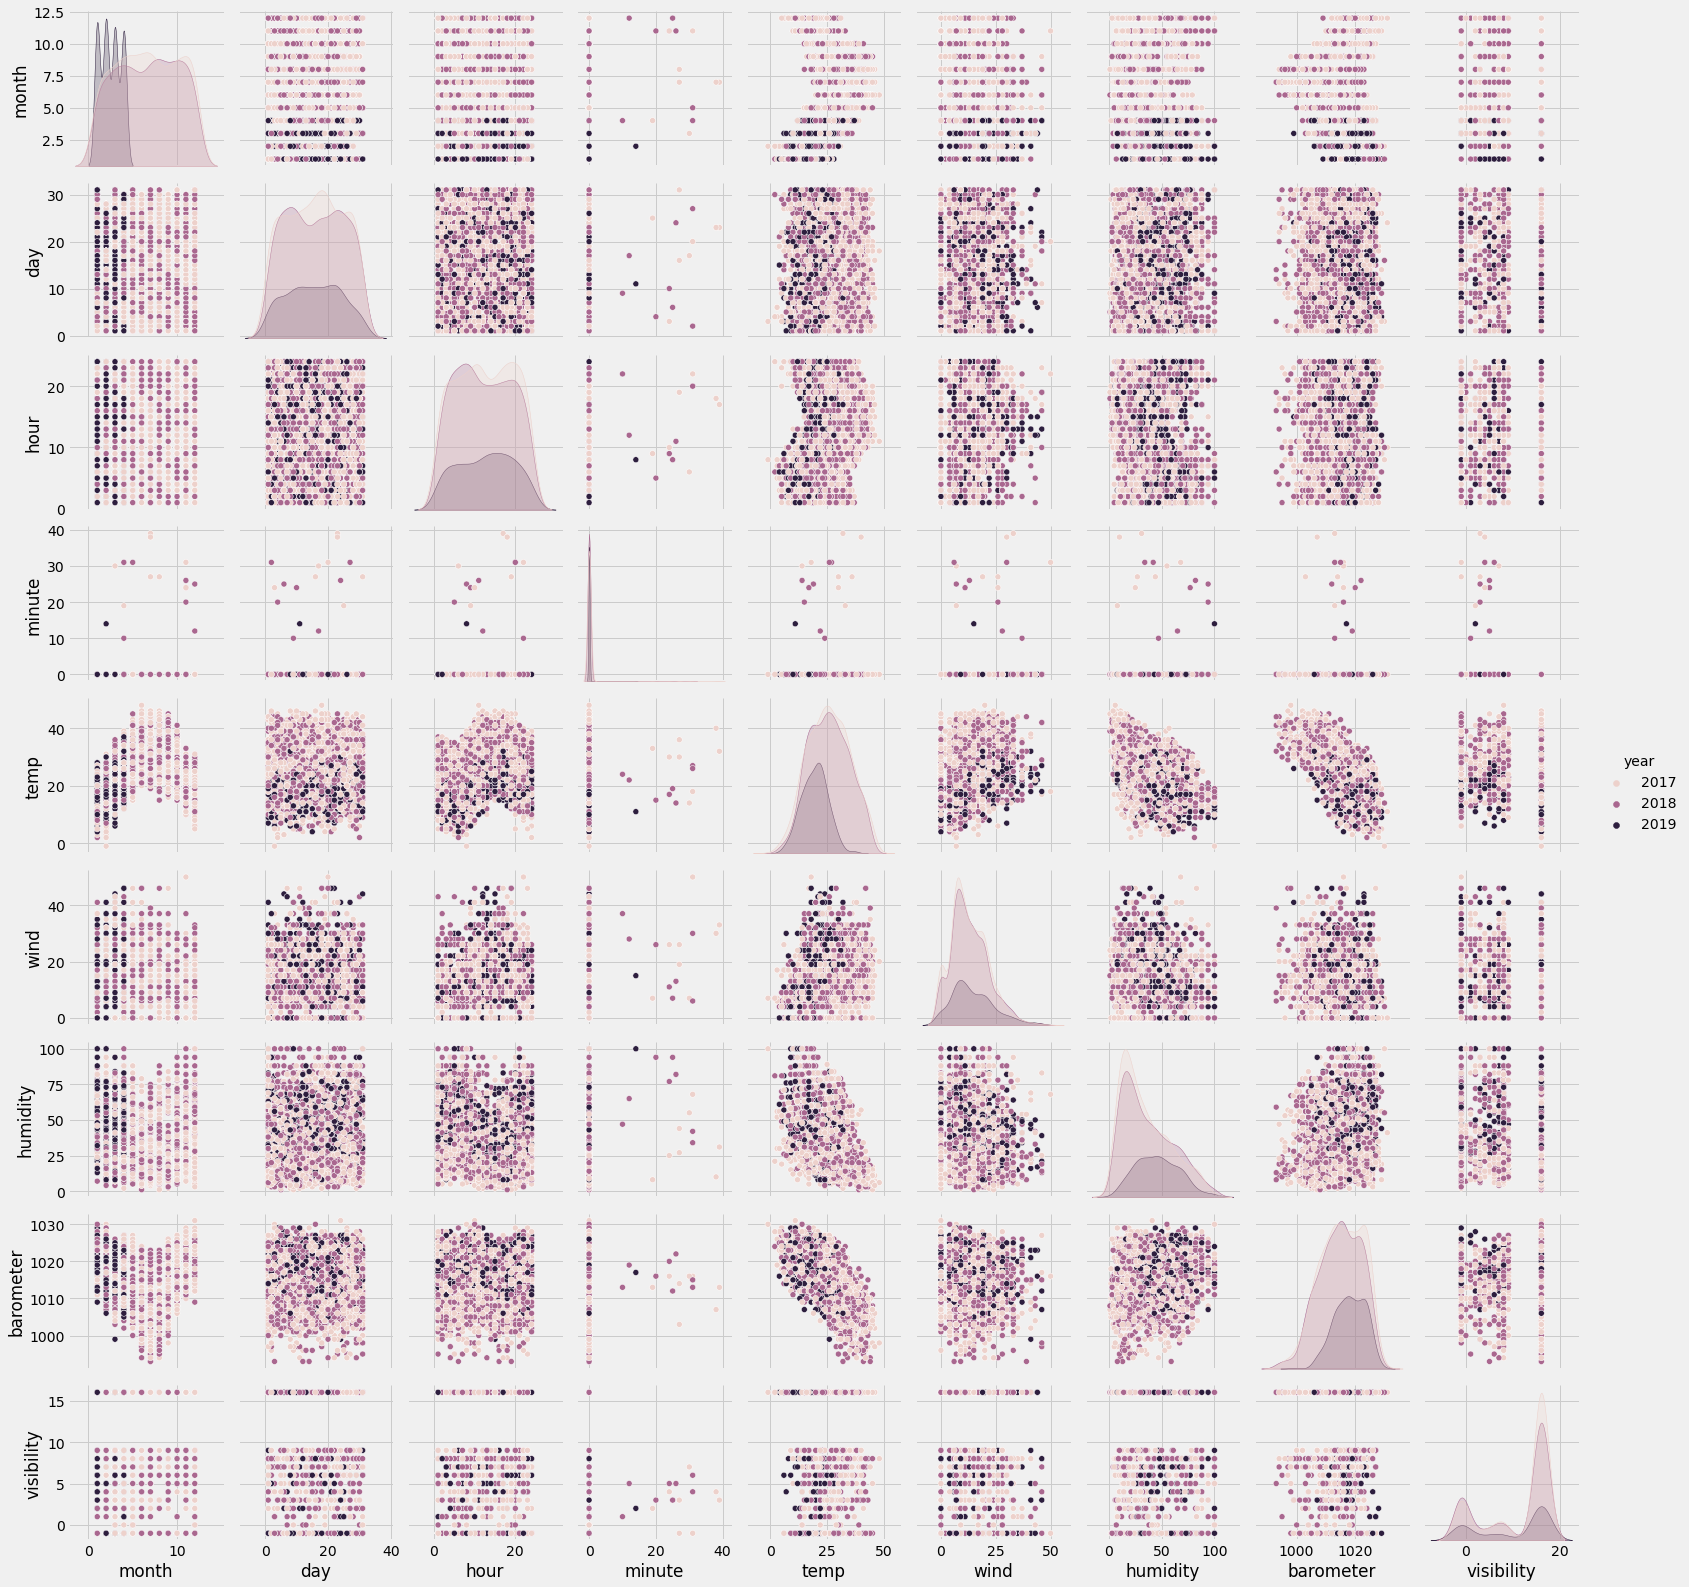

In [25]:
sns.pairplot(df.loc[:,'year':'visibility'].sample(3000) ,hue='year')

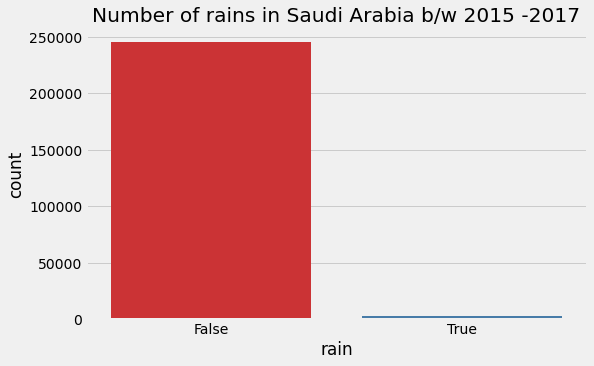

In [26]:
#check labels target
f, ax = plt.subplots(figsize=(8, 5))
plt.title('Number of rains in Saudi Arabia b/w 2015 -2017')
ax = sns.countplot(x="rain", data=df, palette="Set1")
plt.show()

dataset are not balnced to I will implement RandomUnderSampler

In [27]:
df['rain'].value_counts()

False    245696
True       3327
Name: rain, dtype: int64

#### 3.2 Explorering rain cross cities and years

In [28]:
city_rain_rate = pd.DataFrame(df.groupby(by=['city','year'])['rain'].sum())

In [29]:
city_rain_rate = city_rain_rate.reset_index()

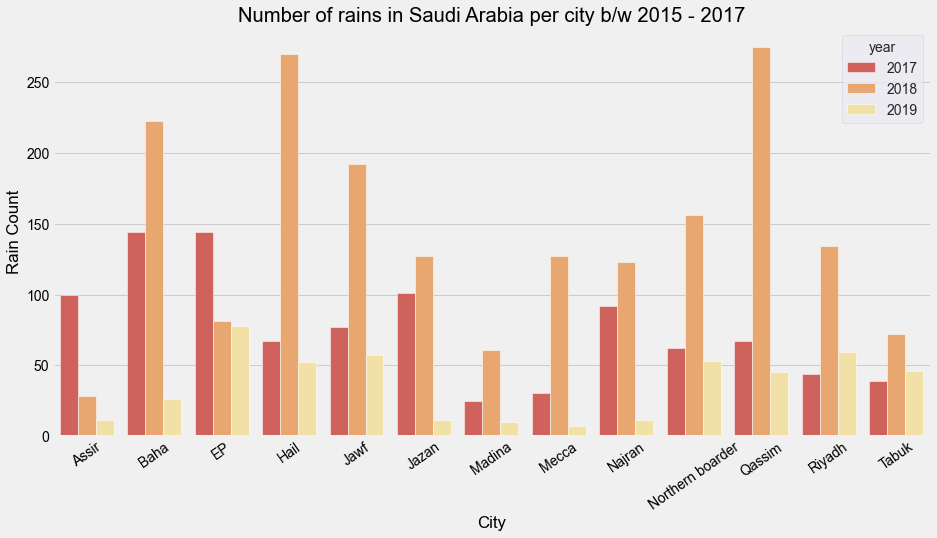

In [30]:
plt.subplots(figsize=(14, 7))


sns.set_style('darkgrid')
sns.set_palette("Spectral" )
sns.barplot(data=city_rain_rate, x="city", y="rain", ci=None, hue='year')
plt.title('Number of rains in Saudi Arabia per city b/w 2015 - 2017')
plt.xlabel('City' )
plt.ylabel('Rain Count')
plt.xticks(rotation=35)
sns.despine()

plt.show()

this barchat shows that most of the rain was 2018 most of the time.



# 4. Features Engineering

### 4.1 Engineering outliers in numerical variables

We have seen above (3.1) that the  `wind`, `temp`, `visibility`, `barometer`  columns contain outliers. I will use top-coding approach to cap maximum values and remove outliers from the above variables.




In [31]:
df.loc[:,'temp':'visibility'].describe()

,temp,wind,humidity,barometer,visibility
count,249023.000000,249023.000000,249023.000000,249023.000000,249023.000000
mean,24.722624,12.957104,37.553192,1015.454041,11.053453
std,8.880913,8.711619,23.592329,6.970366,7.053005
min,-4.000000,-1.000000,0.000000,904.000000,-1.000000
25%,18.000000,7.000000,17.000000,1011.000000,5.000000
50%,24.000000,11.000000,32.000000,1016.000000,16.000000
75%,31.000000,19.000000,55.000000,1021.000000,16.000000
max,50.000000,163.000000,100.000000,1101.000000,161.000000


- `temp`  outliers are values < -1.5 or > 50.5
- `wind`  outliers are values < -11.0 or > 37.0
- `humidity`  outliers are values < -40.0 or > 112.0
- `barometer`  outliers are values < 996.0 or > 1036.0
- `visibility`  outliers are values < -11.5 or > 32.5

In [32]:
# setting the outliers to max or min value 
df['temp'] = np.where(df['temp']<-1.5 , -1.5 , df['temp'])
df['wind'] = np.where(df['wind']>37.0, 37.0, df['wind'])
df['wind'] = np.where(df['wind']<0, 0, df['wind'])
df['visibility'] = np.where(df['visibility']>32.5, 32.5, df['visibility'])
df['visibility'] = np.where(df['visibility']<0, 0, df['visibility'])
df['barometer'] = np.where(df['barometer']>1036.0, 1036.0, df['barometer'])
df['barometer'] = np.where(df['barometer']<996.0 , 996.0 , df['barometer'])

In [33]:
df.loc[:,'temp':'visibility'].describe()

,temp,wind,humidity,barometer,visibility
count,249023.000000,249023.000000,249023.000000,249023.000000,249023.000000
mean,24.722690,12.905406,37.553192,1015.463815,11.251766
std,8.880712,8.529225,23.592329,6.932857,6.702366
min,-1.500000,0.000000,0.000000,996.000000,0.000000
25%,18.000000,7.000000,17.000000,1011.000000,5.000000
50%,24.000000,11.000000,32.000000,1016.000000,16.000000
75%,31.000000,19.000000,55.000000,1021.000000,16.000000
max,50.000000,37.000000,100.000000,1036.000000,32.500000


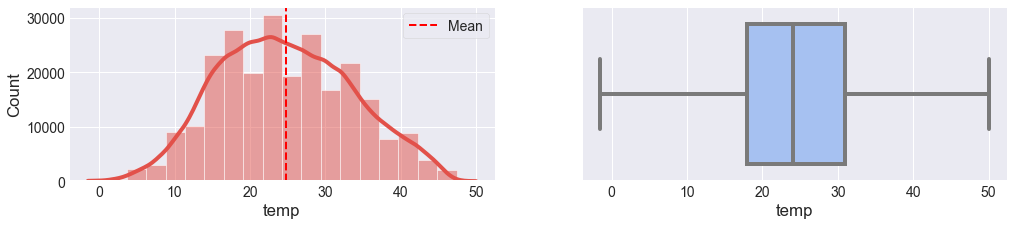

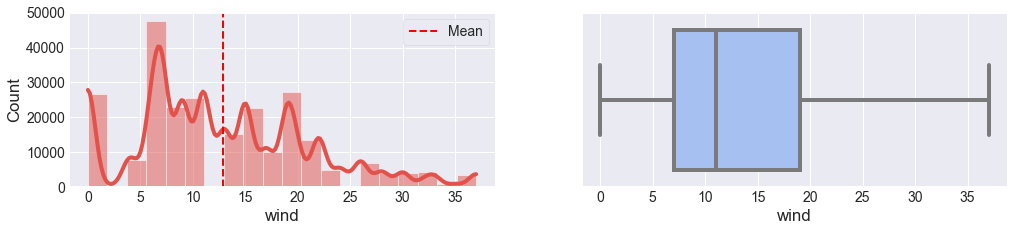

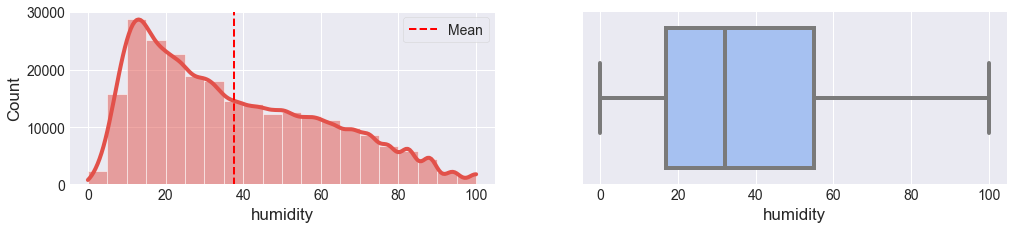

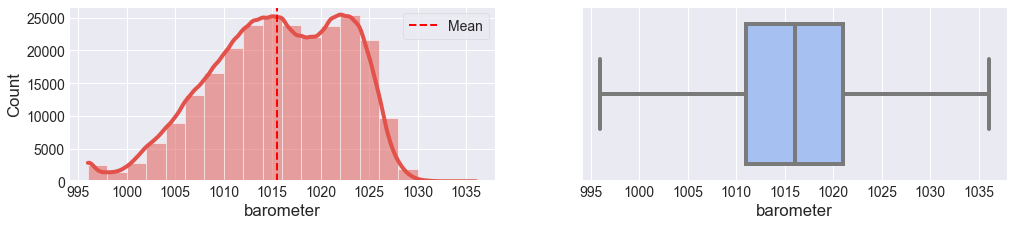

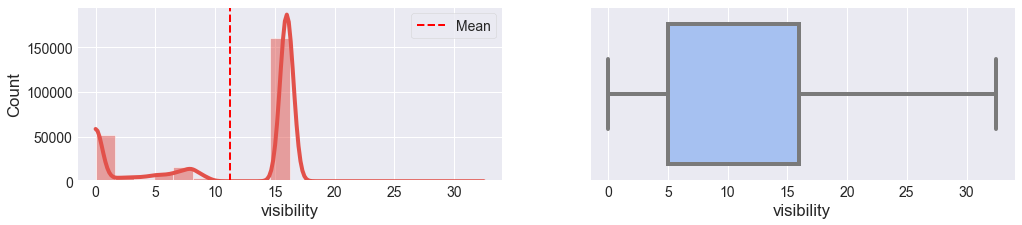

In [34]:
num_cols=df.loc[:,'temp':'visibility'].select_dtypes(include=['int64','float64']).columns.tolist() # a revised list of numerical features  

for i in num_cols:
   
    fig, axs = plt.subplots(1,2,figsize=(15, 3))

    sns.histplot(df[i],bins=20, kde=True,ax=axs[0]);
    sns.boxplot(x= df[i], ax = axs[1], color='#99befd', fliersize=1);
    
    axs[0].axvline(df[i].mean(), color='r', linewidth=2, linestyle='--', label='Mean')
    axs[0].legend()

Apply one HostEncoding to the city variables

In [35]:
c = pd.get_dummies(df['city'], drop_first=True)

df  = pd.concat([c,df], axis=1 )

In [36]:
df.drop('city' , axis =1 , inplace= True)

In [37]:
df.head()

,Baha,EP,Hail,Jawf,Jazan,Madina,Mecca,Najran,Northern boarder,Qassim,...,month,day,hour,minute,temp,wind,humidity,barometer,visibility,rain
0,0,0,0,0,0,0,0,0,0,1,...,1,1,24,0,17.0,11.0,64.0,1018.0,16.0,False
1,0,0,0,0,0,0,0,0,0,1,...,1,1,1,0,17.0,6.0,64.0,1018.0,16.0,False
2,0,0,0,0,0,0,0,0,0,1,...,1,1,3,0,15.0,11.0,72.0,1019.0,16.0,False
3,0,0,0,0,0,0,0,0,0,1,...,1,1,4,0,15.0,11.0,72.0,1019.0,16.0,False
4,0,0,0,0,0,0,0,0,0,1,...,1,1,5,0,15.0,9.0,72.0,1019.0,16.0,False


### 4.1  Deal with imbalanced

In [38]:
df['rain'].value_counts()

False    245696
True       3327
Name: rain, dtype: int64

In [39]:
X = df.drop(['rain'], axis=1)
y = df['rain']

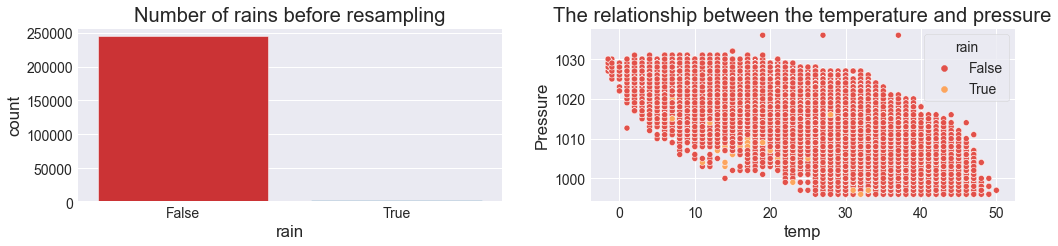

In [40]:
#check labels target
fig, axs = plt.subplots(1,2,figsize=(15, 3))
plt.subplot(1, 2, 1)

plt.title('Number of rains before resampling')
ax = sns.countplot(x="rain", data=df, palette="Set1")

plt.subplot(1, 2, 2)
fig = sns.scatterplot(data=df, x="temp", y="barometer", hue="rain")
fig.set_xlabel('temp')
fig.set_ylabel('Pressure')
fig.set_title('The relationship between the temperature and pressure');
plt.show()

I just showed the current rain observation with 3327 out of 249023 . Next I will implement SMOTE for balancing the data.

In [41]:
from imblearn.over_sampling import SMOTE

In [42]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [43]:
# df_resampled just for visualiation
df_resampled = pd.concat([X,y], axis =1)

In [44]:
df_resampled['rain'].value_counts()

False    245696
True     245696
Name: rain, dtype: int64

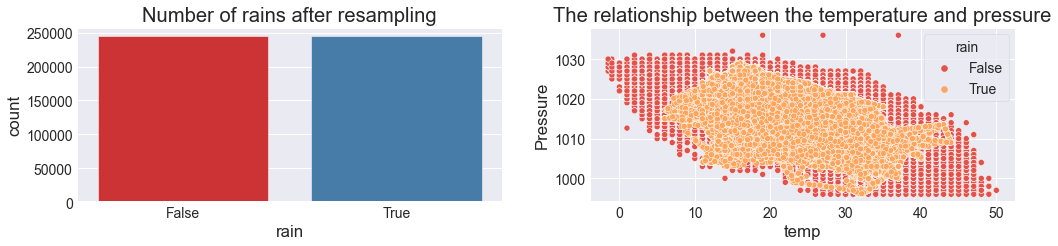

In [45]:
#just to just to illustrate the difference
fig, axs = plt.subplots(1,2,figsize=(15, 3))
plt.subplot(1, 2, 1)

plt.title('Number of rains after resampling')
ax = sns.countplot(x="rain", data=df_resampled, palette="Set1")

plt.subplot(1, 2, 2)
fig = sns.scatterplot(data=df_resampled, x="temp", y="barometer", hue="rain")
fig.set_xlabel('temp')
fig.set_ylabel('Pressure')
fig.set_title('The relationship between the temperature and pressure');
plt.show()

SMOTE has balanced my data equaly with 245696 in each label.

### 4.2 Feature Scaling

In [46]:
# first lets split to train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [48]:
X_train.shape , X_test.shape

((393113, 22), (98279, 22))

# 5. Model

### 5.1 logistic regression model



In [49]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

# instantiate the model
lg = LogisticRegression(solver= 'liblinear', C=1000)

# fit the model
lg.fit(X_train, y_train)

LogisticRegression(C=1000, solver='liblinear')

In [50]:
# predict the test set
y_pred_lg = lg.predict(X_test)

In [51]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_lg)))
print('Training set score: {:.4f}'.format(lg.score(X_train, y_train)))

Model accuracy score: 0.8920
Training set score: 0.8935


In [52]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_lg))

              precision    recall  f1-score   support

       False       0.90      0.89      0.89     48973
        True       0.89      0.90      0.89     49306

    accuracy                           0.89     98279
   macro avg       0.89      0.89      0.89     98279
weighted avg       0.89      0.89      0.89     98279



### Confusing Matrix on logistic regression model

In [53]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_lg)
lg_cm = pd.DataFrame(cm)
lg_score = accuracy_score(y_test, y_pred_lg)
lg_cm

,0,1
0,43457,5516
1,5098,44208


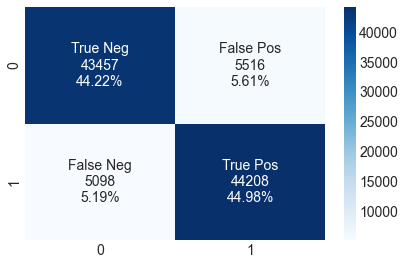

In [54]:
# visualisng confusing matrix
def vcm(cm):
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

vcm(cm)

### 5.3 Artificial Neural Network (ANN) model



In [55]:
import tensorflow as tf
#Initializing the ANN
ann = tf.keras.models.Sequential()
tf.__version__ # checking tf version

2021-11-16 22:54:05.771231: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


'2.6.0'

In [56]:
# Adding the input layer and the first hidden layer

ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [57]:
# Adding the second hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))


In [58]:
# Adding the output layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [59]:
# Compiling the ANN
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [60]:
# Training the ANN on the Training set
ann.fit(X_train, y_train, batch_size = 3200, epochs = 100)

2021-11-16 22:54:05.875317: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
123/123 [==============================] - 1s 1ms/step - loss: 0.7360 - accuracy: 0.5577
Epoch 2/100
123/123 [==============================] - 0s 1ms/step - loss: 0.5138 - accuracy: 0.7637
Epoch 3/100
123/123 [==============================] - 0s 1ms/step - loss: 0.3472 - accuracy: 0.8590
Epoch 4/100
123/123 [==============================] - 0s 1ms/step - loss: 0.2822 - accuracy: 0.8813
Epoch 5/100
123/123 [==============================] - 0s 1ms/step - loss: 0.2589 - accuracy: 0.8890
Epoch 6/100
123/123 [==============================] - 0s 1ms/step - loss: 0.2467 - accuracy: 0.8941
Epoch 7/100
123/123 [==============================] - 0s 1ms/step - loss: 0.2393 - accuracy: 0.8968
Epoch 8/100
123/123 [==============================] - 0s 1ms/step - loss: 0.2344 - accuracy: 0.8982
Epoch 9/100
123/123 [==============================] - 0s 1ms/step - loss: 0.2305 - accuracy: 0.9002
Epoch 10/100
123/123 [==============================] - 0s 1ms/step - loss: 0.2273 - accura

123/123 [==============================] - 0s 1ms/step - loss: 0.1666 - accuracy: 0.9301
Epoch 82/100
123/123 [==============================] - 0s 1ms/step - loss: 0.1665 - accuracy: 0.9303
Epoch 83/100
123/123 [==============================] - 0s 1ms/step - loss: 0.1665 - accuracy: 0.9302
Epoch 84/100
123/123 [==============================] - 0s 1ms/step - loss: 0.1664 - accuracy: 0.9302
Epoch 85/100
123/123 [==============================] - 0s 1ms/step - loss: 0.1664 - accuracy: 0.9300
Epoch 86/100
123/123 [==============================] - 0s 1ms/step - loss: 0.1664 - accuracy: 0.9303
Epoch 87/100
123/123 [==============================] - 0s 1ms/step - loss: 0.1663 - accuracy: 0.9303
Epoch 88/100
123/123 [==============================] - 0s 1ms/step - loss: 0.1663 - accuracy: 0.9303
Epoch 89/100
123/123 [==============================] - 0s 1ms/step - loss: 0.1662 - accuracy: 0.9303
Epoch 90/100
123/123 [==============================] - 0s 1ms/step - loss: 0.1662 - accuracy: 

In [61]:
#### Predicting the Test set results

In [62]:
y_pred_ann = ann.predict(X_test)
y_pred_ann = (y_pred_ann > 0.5)


In [63]:
ann_score = accuracy_score(y_test, y_pred_ann)
ann_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_ann)))

Model accuracy score: 0.9296


In [64]:
print(classification_report(y_test, y_pred_ann))

              precision    recall  f1-score   support

       False       0.94      0.91      0.93     48973
        True       0.92      0.94      0.93     49306

    accuracy                           0.93     98279
   macro avg       0.93      0.93      0.93     98279
weighted avg       0.93      0.93      0.93     98279



### confusing Matrix on ANN

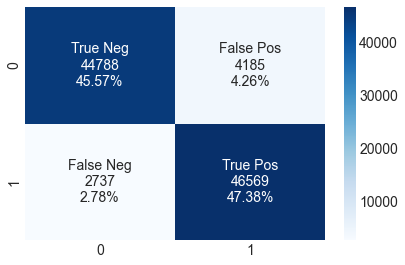

In [65]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_ann)

# visualisng confusing matrix
vcm(cm)

### 5.3 Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [67]:
y_pred_rf = classifier.predict(X_test)

In [68]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_rf)))
print('Training set score: {:.4f}'.format(classifier.score(X_train, y_train)))

Model accuracy score: 0.9959
Training set score: 0.9998


In [69]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00     48973
        True       1.00      1.00      1.00     49306

    accuracy                           1.00     98279
   macro avg       1.00      1.00      1.00     98279
weighted avg       1.00      1.00      1.00     98279



### confusing Matrix on random Forest

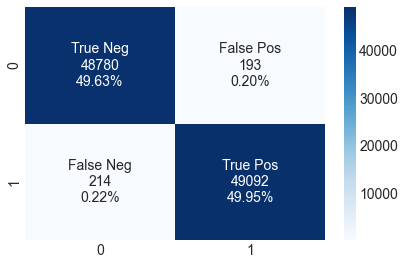

In [70]:
cm = confusion_matrix(y_test, y_pred_rf)
rf_score =accuracy_score(y_test, y_pred_rf)

# visualisng confusing matrix
vcm(cm)

### 6. Conclusion 

In Conclusion, I have cleaned up the dataset by replacing the missing values with mean per city. 
In addion, I extracted the `Rain` from the `weather` to form up the target. Further more, I have reseted the outliers to the minimum and maximum values then I have balanced the data with SMOTE and the Feature Scaling is implemented.

Finaly, I have train the features matrix with three models and get the accuracy, recall, precision and F1-score:

1- `LogisticRegression`.

2- `Artificial Neural Network` (ANN).

3- `RandomForestClassifier`.

I concluod that, `RandomForestClassifier` was the best model fit with accuracy score `99.6 %`.


In [71]:
print('LogisticRegression :' , round(lg_score * 100,2) , '%')
print('Artificial Neural Network :' , round(ann_score* 100,2), '%')
print('RandomForestClassifier' , round(rf_score* 100,2), '%')

LogisticRegression : 89.2 %
Artificial Neural Network : 92.96 %
RandomForestClassifier 99.59 %
